In [120]:
from pathlib import Path

import polars as pl

from plot_functions import bar_plot, distribution_plot, line_plot_variables, violin_plot, scatter_with_regression
from utils.metrics_process import read_metrics, get_assistant_data, aggregate_df

## SETUP

In [121]:
# prompt version (currently only working with 2.0, but nice to be able to easily change)
version = 3.0

In [122]:
metrics_dir = Path.cwd().parents[0] / "metrics"

plots_dir = Path.cwd().parents[0] / "plots" / f"v{version}"

curves_dir = plots_dir / "curves"
dist_dir = plots_dir / "dists"
violins_dir = plots_dir / "violins"

for dir in [curves_dir, dist_dir, violins_dir]:
    dir.mkdir(parents=True, exist_ok=True)

In [123]:
# for giving shorter names in df 
model_dict = {
    "mlx-community--Qwen2.5-7B-Instruct-1M-4bit": "Qwen 2.5 7B Instruct 1M (4bit)",
    "mlx-community--meta-Llama-3.1-8B-Instruct-4bit": "Llama 3.1 8B Instruct (4bit)",
    "meta-llama--Llama-3.1-8B-Instruct": "Llama 3.1 8B Instruct",
    "Qwen--Qwen2.5-7B-Instruct": "Qwen 2.5 7B Instruct",
    "mistralai--Mistral-7B-Instruct-v0.3": "Mistral 7B Instruct v0.3",
    "meta-llama--Llama-3.3-70B-Instruct-Turbo": "Llama 3.3 70B Instruct Turbo"
}

## TEXT STATS: Load and Process

In [124]:
df = read_metrics(metrics_path=metrics_dir, model_dict=model_dict, version=version, metric_types=["text_stats"])
assistant_df = get_assistant_data(df)

In [125]:
assistant_df

role,content,model,group,id,fernandez_huerta,szigriszt_pazos,gutierrez_polini,crawford,flesch_kincaid_grade,total_message_number
str,str,str,enum,str,f64,f64,f64,f64,f64,i64
"""assistant""","""Hola! ¿Cómo estás hoy? ¡Bienve…","""Mistral 7B Instruct v0.3""","""A1""","""20250322-203105.json""",95.97,91.03,46.98,2.7,7.9,1
"""assistant""","""Hola Delia, un placer conocert…","""Mistral 7B Instruct v0.3""","""A1""","""20250322-203105.json""",95.35,93.7,45.53,2.6,8.1,2
"""assistant""","""Hola Carlos, un placer conocer…","""Mistral 7B Instruct v0.3""","""A1""","""20250322-203105.json""",102.27,98.9,47.92,2.0,6.6,3
"""assistant""","""Hola Carlos, encantado de cono…","""Mistral 7B Instruct v0.3""","""A1""","""20250322-203105.json""",88.33,85.36,44.72,3.3,9.7,4
"""assistant""","""Hola Carlos, me parece que est…","""Mistral 7B Instruct v0.3""","""A1""","""20250322-203105.json""",92.5,86.05,45.08,3.4,9.2,5
…,…,…,…,…,…,…,…,…,…,…
"""assistant""","""¡Perfecto! Eso suena como una …","""Qwen 2.5 7B Instruct""","""C1""","""20250326-024438.json""",102.27,99.78,44.16,1.9,6.6,5
"""assistant""","""¡Muy bien hecho! Has corregido…","""Qwen 2.5 7B Instruct""","""C1""","""20250326-024438.json""",95.66,89.54,40.12,2.8,8.0,6
"""assistant""","""¡Felicidades! Has hecho un exc…","""Qwen 2.5 7B Instruct""","""C1""","""20250326-024438.json""",74.91,73.2,33.82,4.4,12.6,7


### Plot

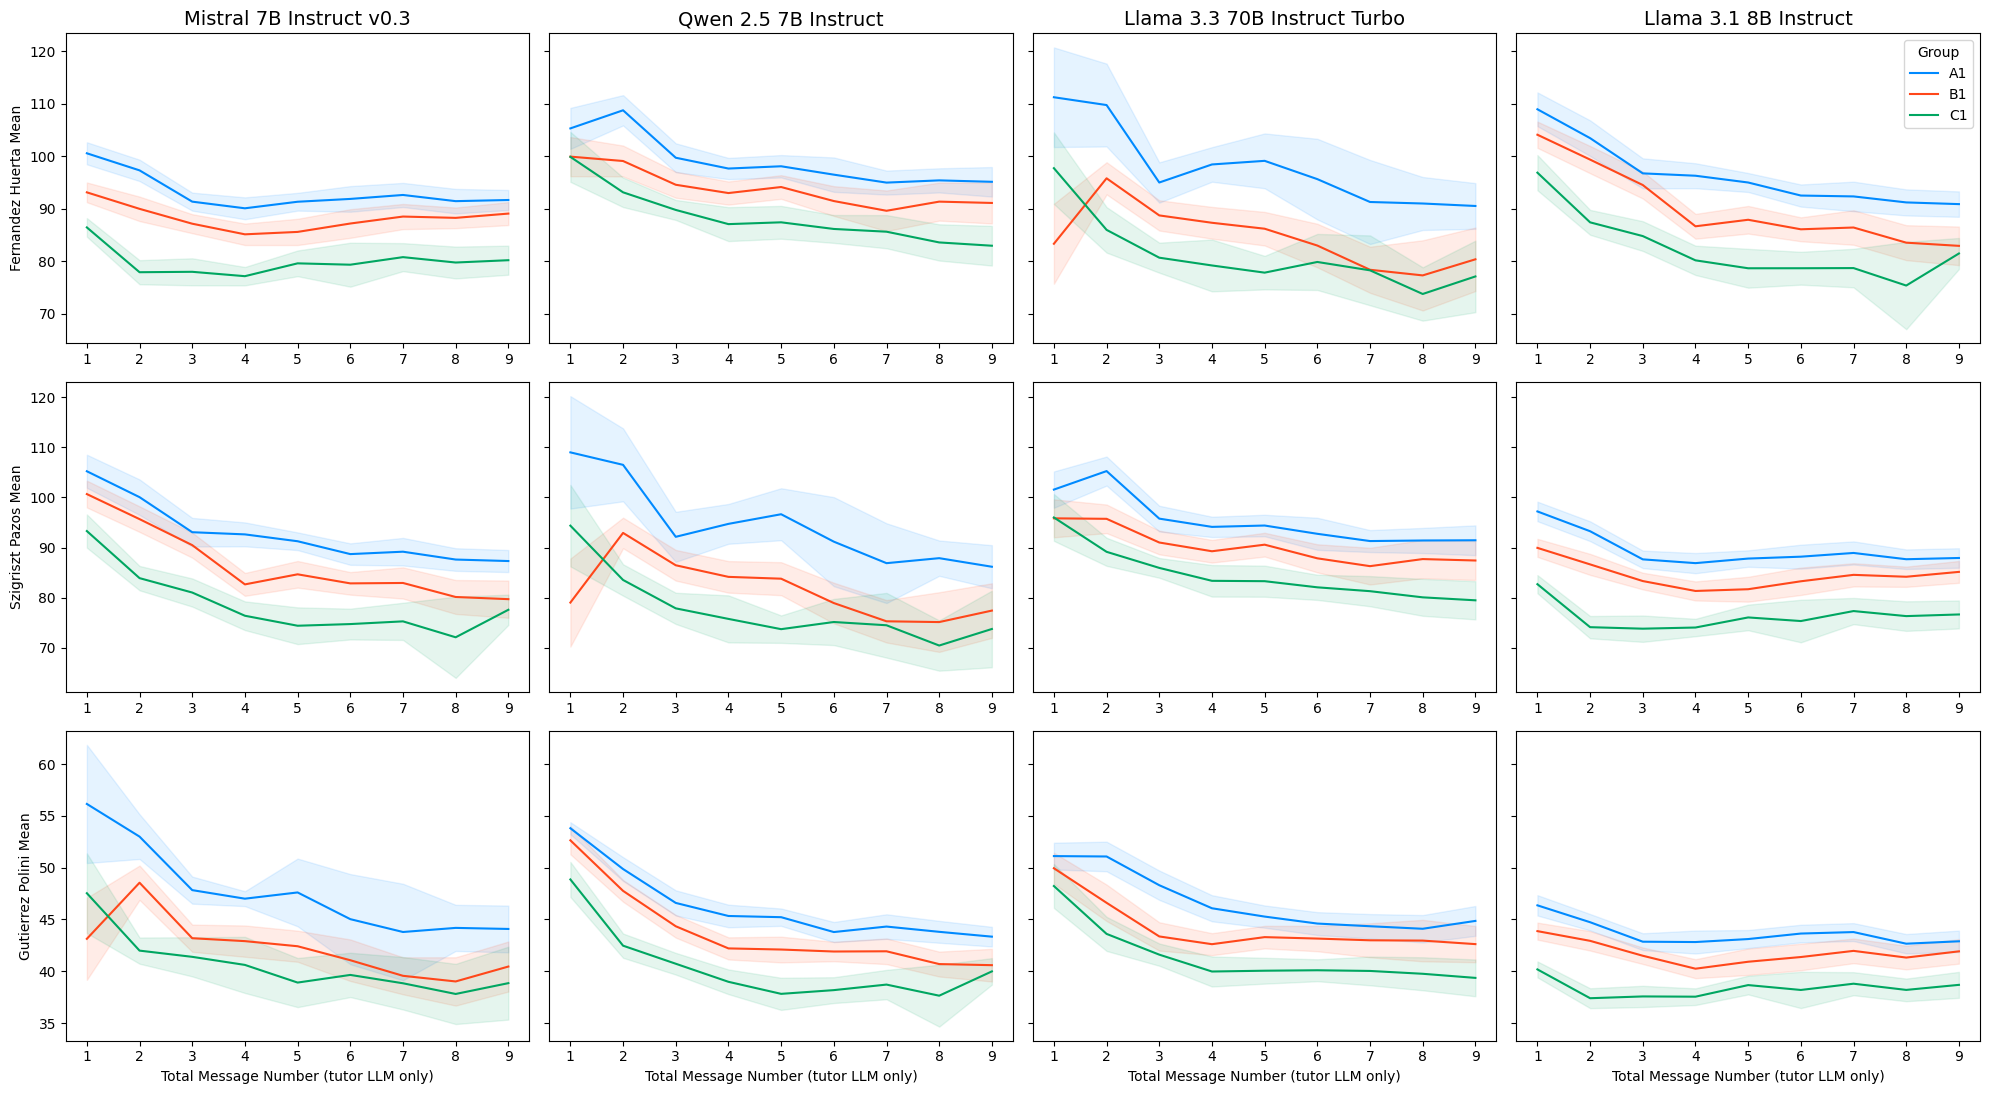

In [126]:
# only take cols 
cols = ["fernandez_huerta", "szigriszt_pazos", "gutierrez_polini", "flesch_kincaid_grade", "crawford"]

# aggregate data
agg_df = aggregate_df(assistant_df, cols_to_aggregate=cols, ci_to_cols=True)

colors = ["#008aff", "#ff471a", "#00a661"]

cols = ["fernandez_huerta", "szigriszt_pazos", "gutierrez_polini"]
vars = [f"{col}_mean" for col in cols]
ci_vars = [f"{col}_ci" for col in cols]

fig = line_plot_variables(df=agg_df, 
                    x_var="total_message_number", 
                    y_vars=vars, 
                    ci_vars=ci_vars,
                    group_var="group",
                    model_var="model", 
                    x_label_text="Total Message Number (tutor LLM only)", 
                    group_colors=colors)

fig.savefig(curves_dir / "spanish_readability_high_easy.png", dpi=300)

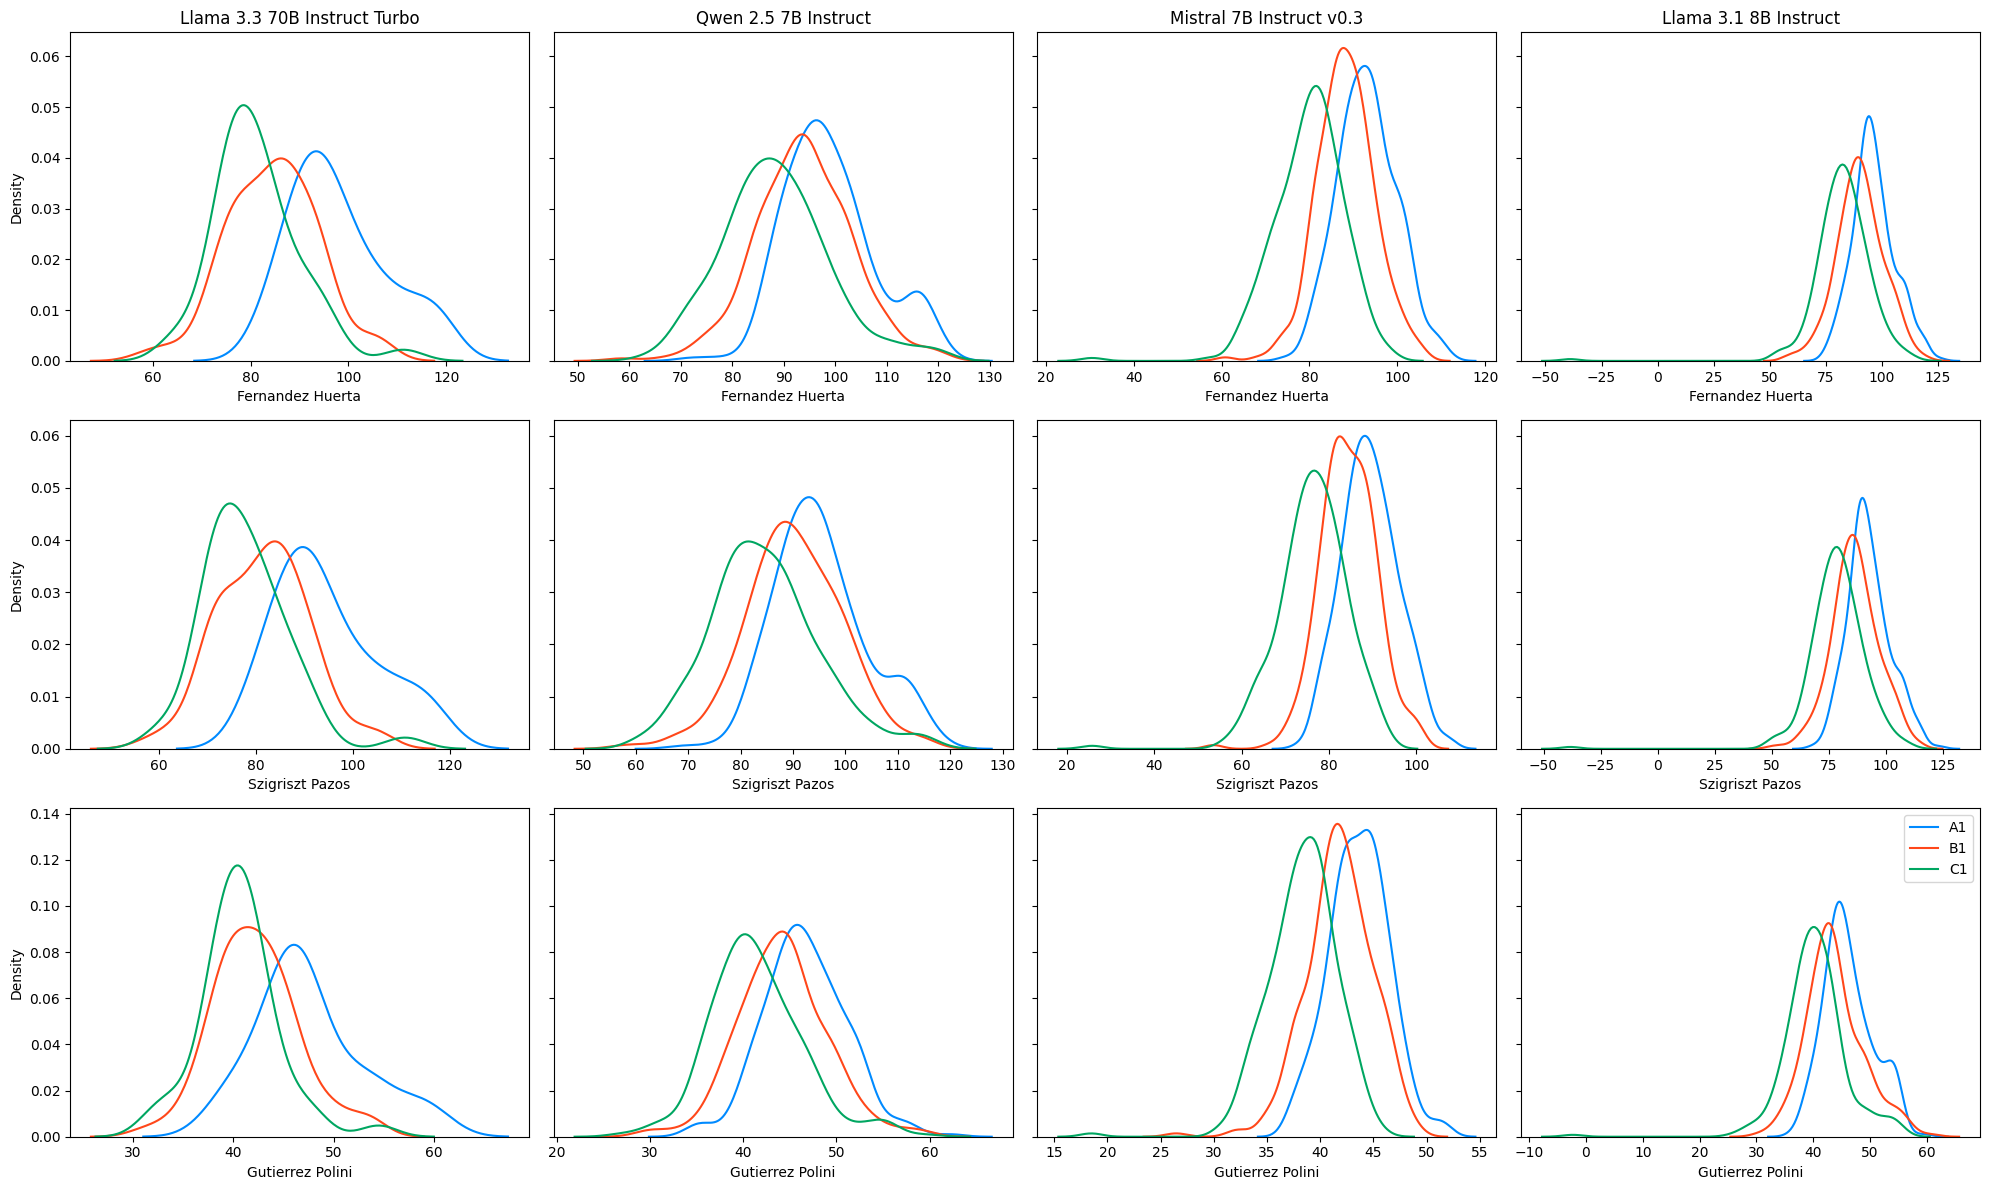

In [127]:
fig = distribution_plot(assistant_df, 
                        x_vars=["fernandez_huerta", "szigriszt_pazos", "gutierrez_polini"], 
                        group_var="group",
                        model_var="model",
                        normalize=True,
                        x_label_texts=["Fernandez Huerta", "Szigriszt Pazos", "Gutierrez Polini"], 
                        density_lines=True)

fig.savefig(dist_dir / "spanish_readability_high_easy.png", dpi=300)

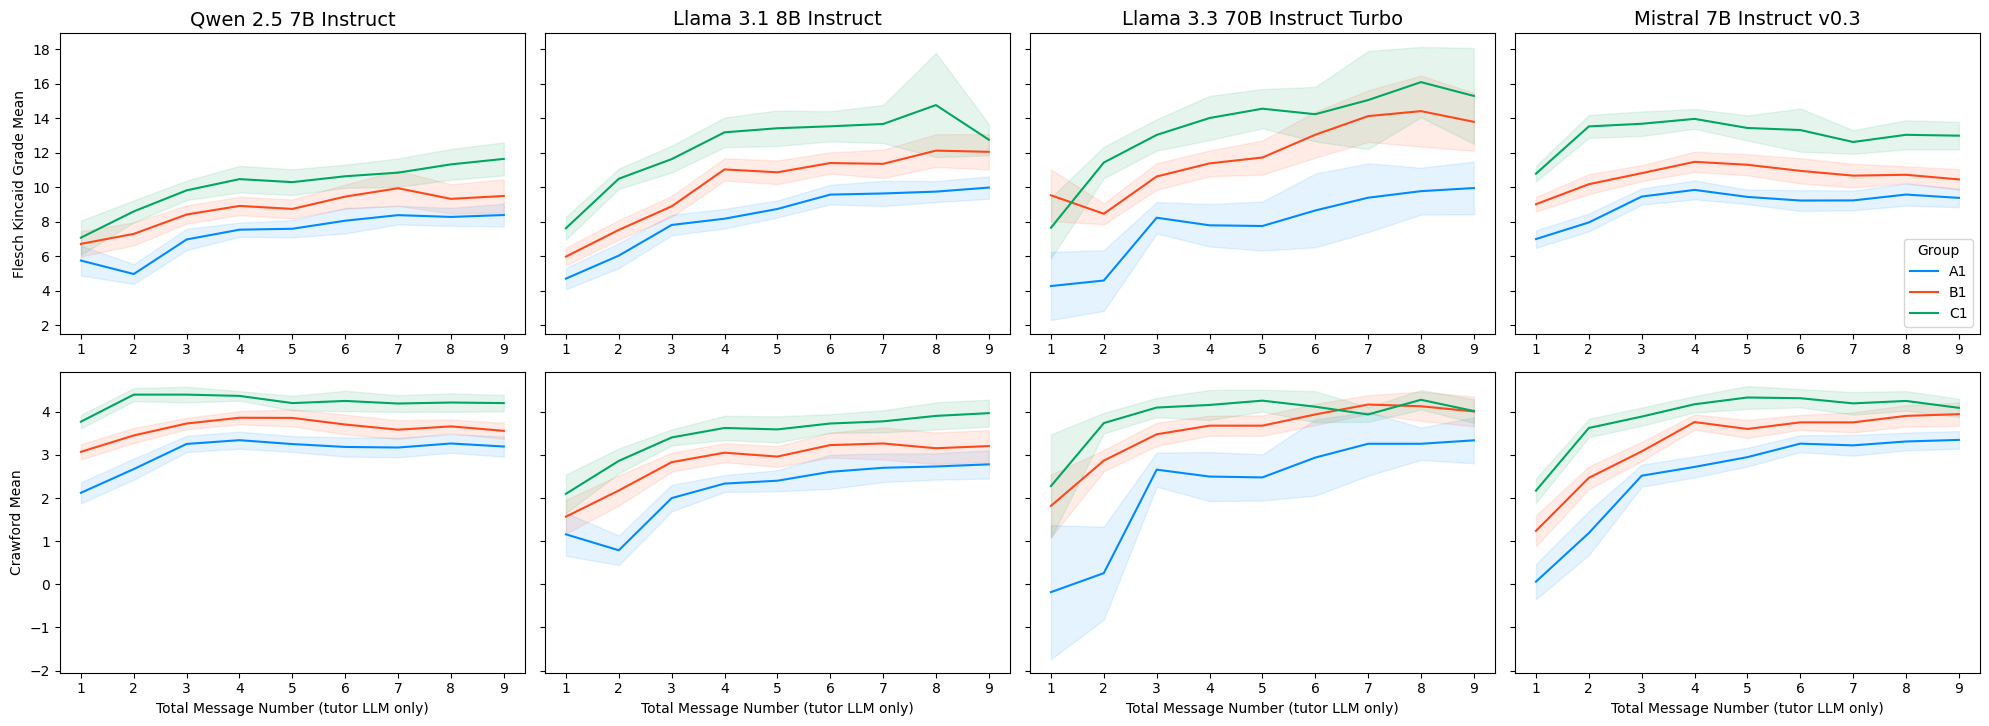

In [128]:
colors = ["#008aff", "#ff471a", "#00a661"]

cols = ["flesch_kincaid_grade", "crawford"]
vars = [f"{col}_mean" for col in cols]
ci_vars = [f"{col}_ci" for col in cols]

fig = line_plot_variables(df=agg_df, 
                    x_var="total_message_number", 
                    y_vars=vars,
                    ci_vars=ci_vars,
                    group_var="group",
                    model_var="model", 
                    x_label_text="Total Message Number (tutor LLM only)", 
                    group_colors=colors)

fig.savefig(curves_dir / "spanish_readability_high_difficult.png", dpi=300)

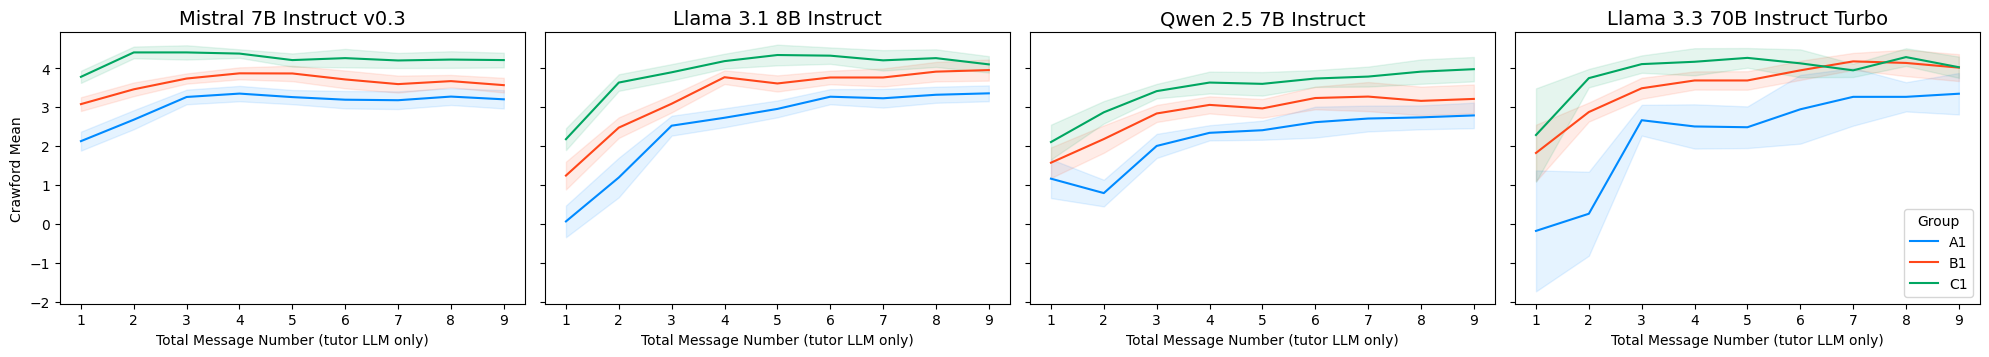

In [129]:
colors = ["#008aff", "#ff471a", "#00a661"]

fig = line_plot_variables(df=agg_df, 
                    x_var="total_message_number", 
                    y_vars=["crawford_mean"], 
                    ci_vars=["crawford_ci"],
                    group_var="group",
                    model_var="model", 
                    x_label_text="Total Message Number (tutor LLM only)", 
                    group_colors=colors)

fig.savefig(curves_dir/ "crawford.png", dpi=300)

## Dependency Distance, Doc Length, Proportion Unique Tokens

In [130]:
df = read_metrics(metrics_path=metrics_dir, model_dict=model_dict, version=version, metric_types=["textdescriptives"])
assistant_df = get_assistant_data(df)

In [131]:
cols = ["doc_length", "proportion_unique_tokens", "dependency_distance_mean"]
agg_df = aggregate_df(assistant_df, cols_to_aggregate=cols, ci_to_cols=True)

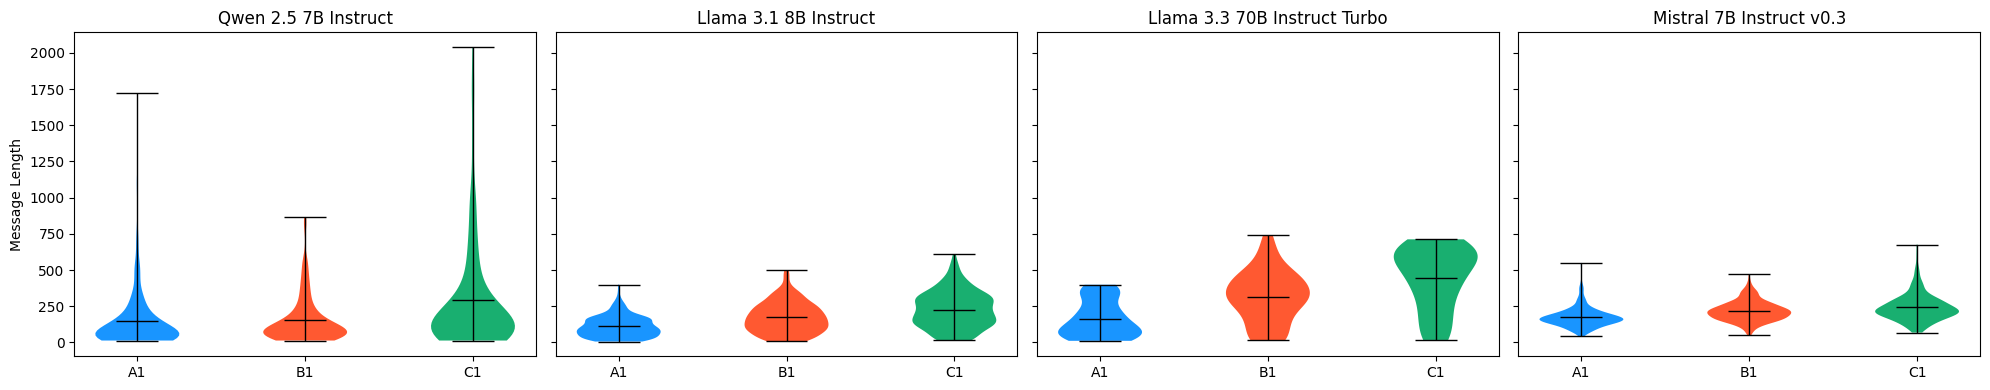

In [ ]:
fig = violin_plot(
    assistant_df,  # Use the full dataset
    x_vars=["doc_length"],  # Pass raw values instead of mean
    group_var="group",
    model_var="model",
    y_label_texts=["Message Length"]
)

fig.savefig(violins_dir / "doc_length_violin.png", dpi=300)

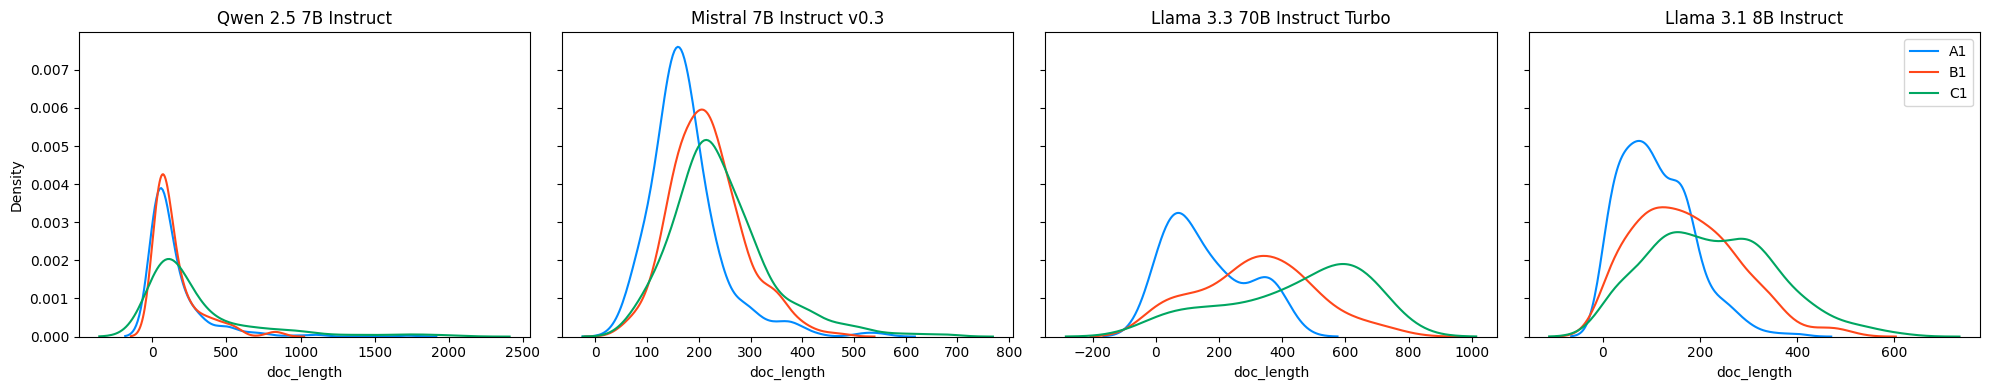

In [ ]:
fig = distribution_plot(assistant_df, 
                        x_vars=["doc_length"], 
                        group_var="group",
                        model_var="model",
                        normalize=True,
                        x_label_texts=["doc_length"], 
                        density_lines=True)

fig.savefig(dist_dir / "doc_length_dist.png", dpi=300)

### Unique Tokens

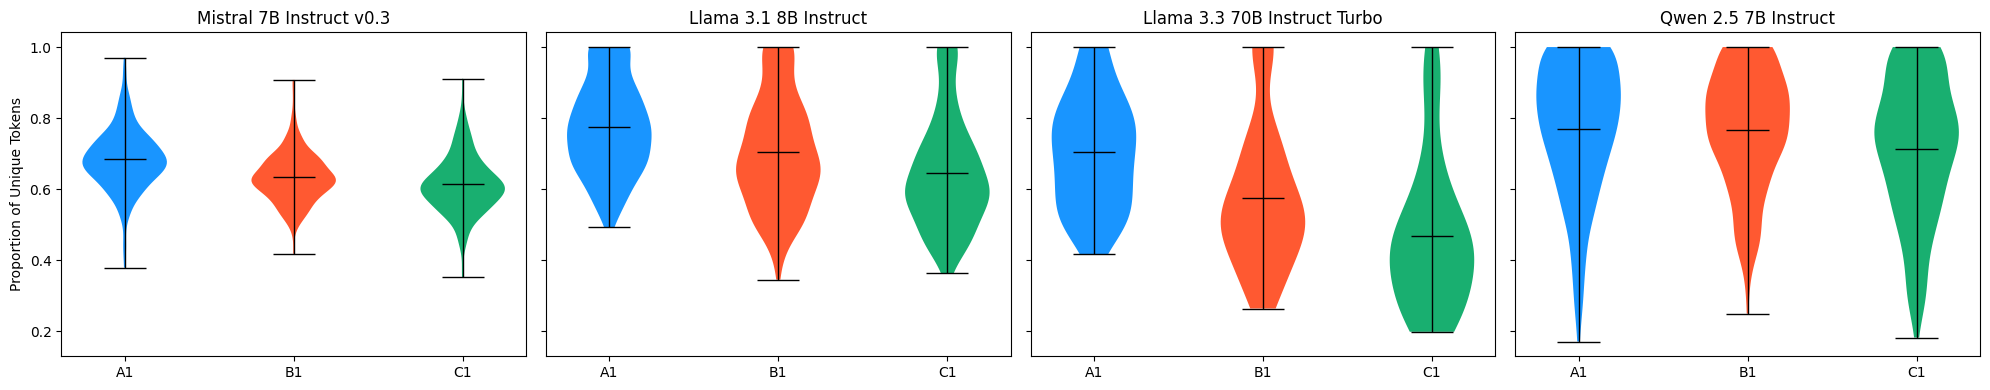

In [134]:
fig = violin_plot(
    assistant_df,  # Use the full dataset
    x_vars=["proportion_unique_tokens"], 
    group_var="group",
    model_var="model",
    y_label_texts=["Proportion of Unique Tokens"]
)

fig.savefig(violins_dir / "unique_tokens_violin.png", dpi=300)

## Length and Unique Tokens over conversation length

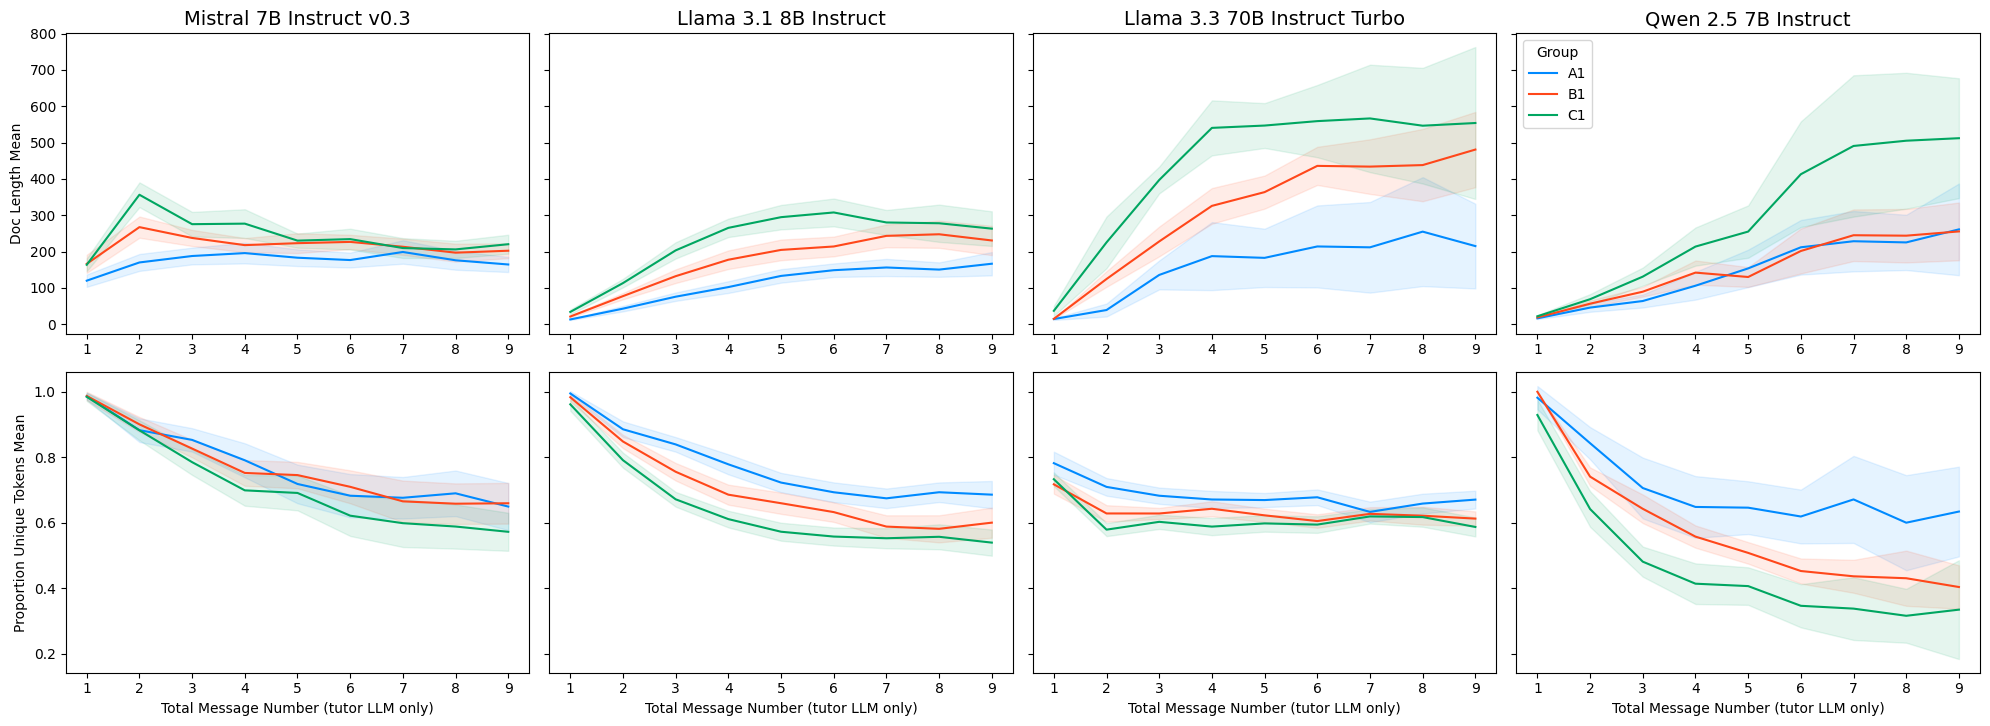

In [135]:
cols = ["doc_length", "proportion_unique_tokens"]
vars = [f"{col}_mean" for col in cols]
ci_vars = [f"{col}_ci" for col in cols]


fig = line_plot_variables(df=agg_df, 
                    x_var="total_message_number", 
                    y_vars=vars,
                    ci_vars=ci_vars,
                    group_var="group",
                    model_var="model", 
                    x_label_text="Total Message Number (tutor LLM only)", 
                    group_colors=colors)

fig.savefig(curves_dir / "doc_length_unique_tokens.png", dpi=300)

### Mean Dependency distance

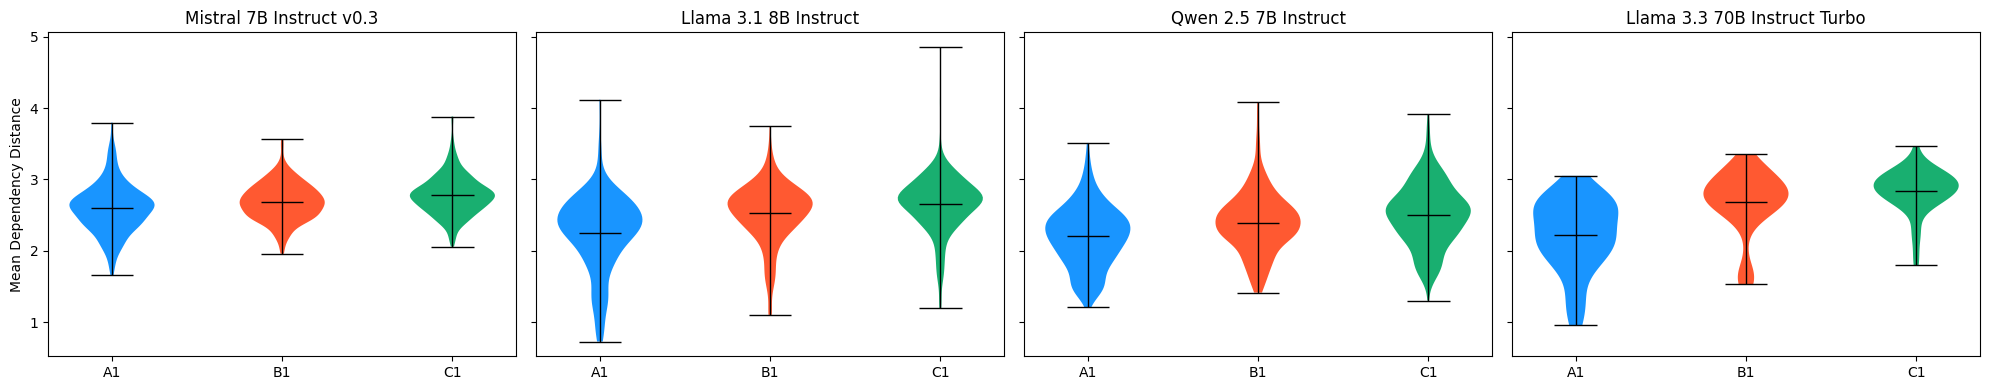

In [136]:
fig = violin_plot(
    assistant_df,  # Use the full dataset
    x_vars=["dependency_distance_mean"], 
    group_var="group",
    model_var="model",
    y_label_texts=["Mean Dependency Distance"]
)

fig.savefig(violins_dir / "mean_dependency_distance.png", dpi=300)

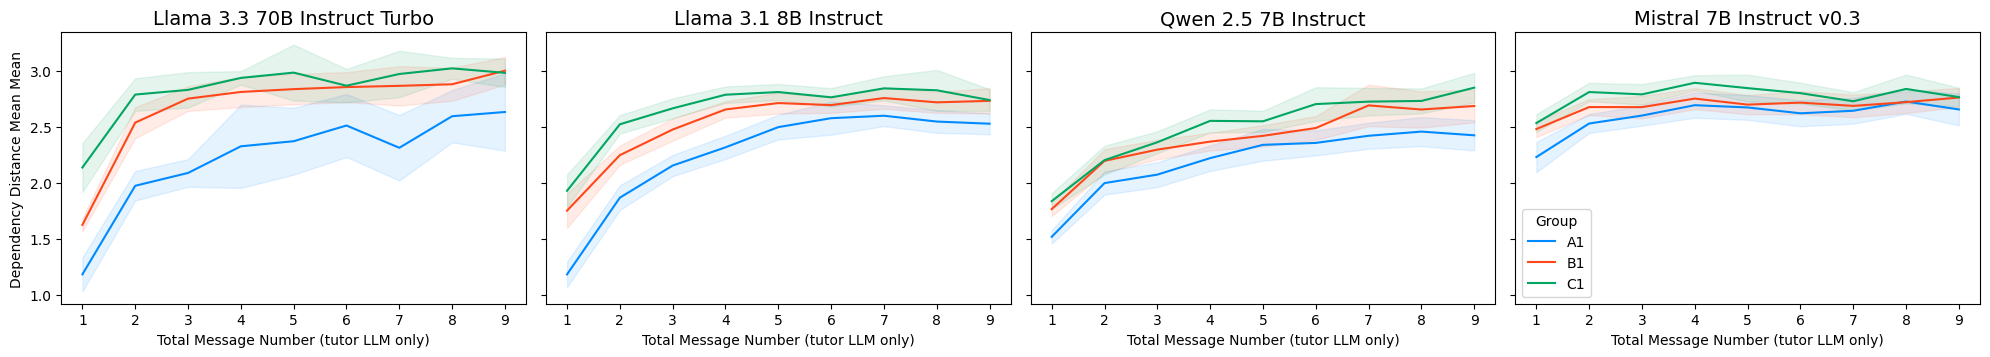

In [137]:
fig = line_plot_variables(df=agg_df, 
                    x_var="total_message_number", 
                    y_vars=["dependency_distance_mean_mean"], 
                    ci_vars=["dependency_distance_mean_ci"],
                    group_var="group",
                    model_var="model", 
                    x_label_text="Total Message Number (tutor LLM only)", 
                    group_colors=colors)

fig.savefig(curves_dir / "mean_dependency_distance.png", dpi=300)

## Surprisals

In [138]:
group_levels = pl.Enum(["A1", "B1", "C1"])

surprisal_df = pl.read_csv(metrics_dir / f"v{version}_surprisal.csv", schema_overrides={"group": group_levels}) 

surprisal_df = surprisal_df.with_columns(pl.col("model").replace_strict(model_dict))

In [139]:
role = "assistant"
filtered_surprisal_df = surprisal_df.filter(pl.col("role") == role)

# assign message numbers
filtered_surprisal_df = filtered_surprisal_df.with_columns(total_message_number=pl.int_range(1, pl.len() + 1).over("id"))

# rename from surprisal_mean to surprisal
filtered_surprisal_df = filtered_surprisal_df.with_columns(
    pl.col("surprisal_mean").alias("surprisal_paragraph")
)

cols = ["surprisal_paragraph"]
# compute average scores
agg_df = (
    filtered_surprisal_df.group_by(["model", "group", "total_message_number"], maintain_order=True)
    .agg([
        *[pl.col(col).mean().alias(f"{col}_mean") for col in cols],
        *[pl.col(col).std().alias(f"{col}_std") for col in cols],
        *[pl.col(col).count().alias(f"{col}_count") for col in cols],
    ])
)

# apply ci
for col in cols:
    agg_df = add_ci_to_col(agg_df, col)

NameError: name 'add_ci_to_col' is not defined

In [ ]:
fig = line_plot_variables(df=agg_df, 
                    x_var="total_message_number", 
                    y_vars=["surprisal_paragraph_mean"],
                    ci_vars=["surprisal_paragraph_ci"],
                    group_var="group",
                    model_var="model", 
                    x_label_text="Total Message Number (tutor LLM only)", 
                    group_colors=colors)

In [ ]:
# distribution plot
fig = distribution_plot(filtered_surprisal_df, 
                        x_vars=["surprisal_paragraph"], 
                        normalize=True,
                        alpha=0.5, 
                        x_label_texts=["Surprisal"], 
                        density_lines=True)